# LGM Virtual Internship Program 2021

### NAME: MALLEESWARI G

### Data Analytics

### 1.IRIS Flower Classification ML Project

In [3]:
# Loading the required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#loading the data
df=pd.read_csv("iris.csv")

In [5]:
#view the head and tail of data for similarities and outliers
df.head()

,Sepal length in cm,Sepal width in cm,petal length in cm,petal width in cm,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.tail()

,Sepal length in cm,Sepal width in cm,petal length in cm,petal width in cm,Class
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica
150,NaN,NaN,NaN,NaN,NaN


In [7]:
# dimension od the dataset to find the fields and attributes of the datasets
df.shape

(151, 5)

In [8]:
# To know the attributes of the dataset
print(df.columns)
df.info()

Index(['Sepal length in cm', 'Sepal width in cm', 'petal length in cm',
       'petal width in cm', 'Class'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sepal length in cm  150 non-null    float64
 1   Sepal width in cm   150 non-null    float64
 2   petal length in cm  150 non-null    float64
 3   petal width in cm   150 non-null    float64
 4   Class               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
print(df['Class'].unique())
print(df.groupby('Class').count())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica' nan]
                 Sepal length in cm  Sepal width in cm  petal length in cm  \
Class                                                                        
Iris-setosa                      50                 50                  50   
Iris-versicolor                  50                 50                  50   
Iris-virginica                   50                 50                  50   

                 petal width in cm  
Class                               
Iris-setosa                     50  
Iris-versicolor                 50  
Iris-virginica                  50  


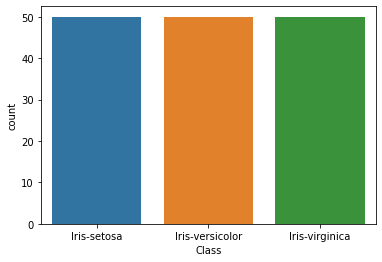

In [10]:
#viewing the frequency plot
sns.countplot(df['Class'],label="Size")
plt.show()

### EDA (Exploratory Data Analytics)

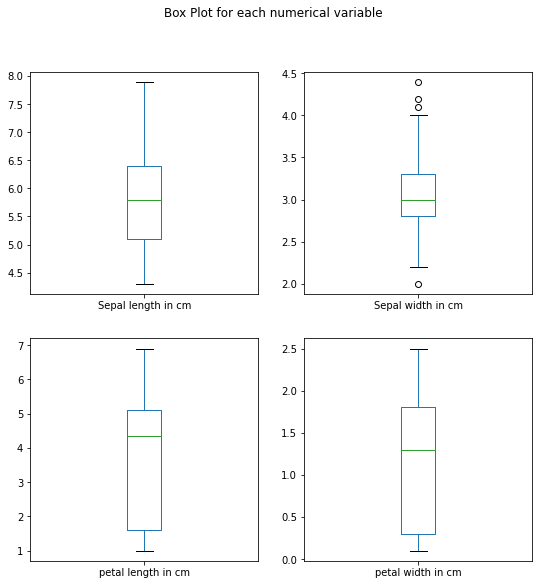

In [11]:
#BOXPLOT Analysis
df.drop('Class', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), title='Box Plot for each numerical variable')
plt.savefig('boxplot')
plt.show()

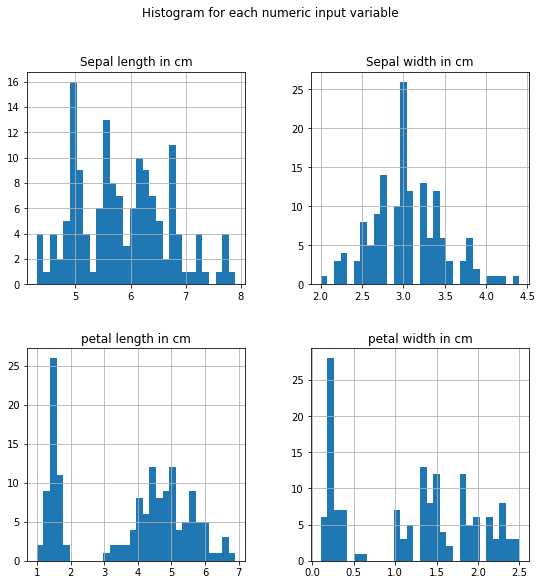

In [12]:
#HISTOGRAM Analysis
import pylab as pl
df.drop('Class' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('Histogram')
plt.show()

In [13]:
#ScatterPLot
df.corr()

,Sepal length in cm,Sepal width in cm,petal length in cm,petal width in cm
Sepal length in cm,1.000000,-0.109369,0.871754,0.817954
Sepal width in cm,-0.109369,1.000000,-0.420516,-0.356544
petal length in cm,0.871754,-0.420516,1.000000,0.962757
petal width in cm,0.817954,-0.356544,0.962757,1.000000


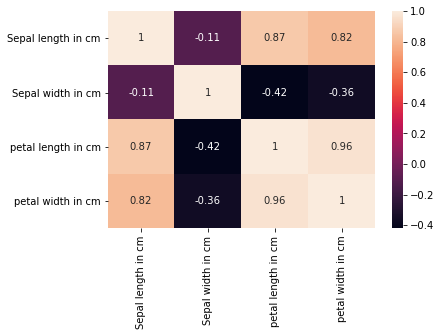

In [14]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [35]:
#Splitting of data
from sklearn.model_selection import train_test_split
feature_names = ['Sepal length in cm', 'Sepal width in cm', 'petal length in cm','petal width in cm']
X = df[feature_names]
y = df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [36]:
# Dropping the NUll Values 
df=df.dropna(axis=0,how='any',thresh=1)
df.shape

(150, 5)

In [37]:
#preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### I'm excited to explore different classification techniques and go for the model with more accuracy.

In [45]:
# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.93
Accuracy of Logistic regression classifier on test set: 0.89


In [46]:
# 2.K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of the K-NN Model for Training data: {:.2f}'.format(knn.score(X_train,y_train)))
print('Accuracy of the K-NN Model for Testing data: {:.2f}'.format(knn.score(X_test,y_test)))


Accuracy of the K-NN Model for Training data: 0.96
Accuracy of the K-NN Model for Testing data: 0.97


In [47]:
# 3.Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))


Accuracy of LDA classifier on training set: 0.98
Accuracy of LDA classifier on test set: 0.97


In [52]:
# 4.Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.95
Accuracy of GNB classifier on test set: 1.00


In [51]:
# 5.Support Vector Machine
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.96
Accuracy of SVM classifier on test set: 0.97


In [53]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = gnb.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



## The Gaussian Naive Bayesian model is the best among the worked models with accuracy of 1.0 for the test data and the confusion matrix shows the same